**Example** 1 We need to enclose a rectangular field with a fence. We have 500 feet of fencing material and a building is on one side of the field and so won’t need any fencing. Determine the dimensions of the field that will enclose the largest area.
![替代文字](http://tutorial.math.lamar.edu/Classes/CalcI/Optimization_Files/image001.png)
In this problem we want to maximize the area of a field and we know that will use 500 ft of fencing material. So, the area will be the function we are trying to optimize and the amount of fencing is the constraint. The two equations for these are,
$$Maximize : A=xy$$
$$Constraint : 500 = x + 2y$$


In [1]:
# 1.1 Import tensorflow and other libraries.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import numpy
from sympy import*
from sympy import*

C:\Users\user\Anaconda3\envs\tensorflow-gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


$$x = 500 − 2y$$
$$A(y) = ( 500 − 2y ) y = 500y − 2y^2 $$
$$A′(y) = 500 − 4y$$

In [2]:
def my_function(y):
    return 500*y-2*y**2

In [3]:
y = Symbol('y')     #定義X為未知數
solve(diff(my_function(y), y))    #對 500y - 2y^2微分,並解出理論解

[125]

In [4]:
y1 = 125
x1 = 500 - 2*y1
A = x1 * y1
print('x1 = ',x1,',y1 = ',y1,',A = ',A)

x1 =  250 ,y1 =  125 ,A =  31250


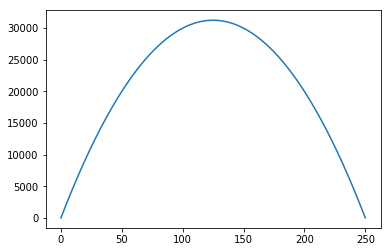

In [5]:
# 1.2 Create input data using NumPy.
x = np.arange(0.0,250.0,0.01)
y = my_function(x)
plt.plot(x,y)

Using gradient descent solve the problem

In [6]:
y = tf.Variable(tf.random_uniform([1], 0, 250))

loss = my_function(y)  # Create an operation that calculates loss.
optimizer = tf.train.GradientDescentOptimizer(-0.1)  # Create an optimizer.
train = optimizer.minimize(loss)  # Create an operation that minimizes loss.
init = tf.initialize_all_variables()  # Create an operation initializes all the variables.

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [7]:
sess = tf.Session()
sess.run(init)
#y_initial_values = sess.run(x)  # Save initial values for plotting later.

# Uncomment the following line to see the initial W and b values.
print(sess.run([y]))

[array([23.869156], dtype=float32)]


In [8]:
for step in range(201):
    sess.run(train)   
print(sess.run([y]))

[array([124.99999], dtype=float32)]


In [9]:
Y_GD = 125
X_GD = 500 - 2*Y_GD
A_GD = X_GD * Y_GD
print('x_GD = ',X_GD ,',y_GD = ', Y_GD , ', A_GD = ',A_GD)

x_GD =  250 ,y_GD =  125 , A_GD =  31250


Using gradient descent solve the problem

In [10]:
from gaft import GAEngine
from gaft.components import BinaryIndividual
from gaft.components import Population
from gaft.operators import TournamentSelection
from gaft.operators import UniformCrossover
from gaft.operators import FlipBitMutation

# Analysis plugin base class.
from gaft.plugin_interfaces.analysis import OnTheFlyAnalysis

# Built-in best fitness analysis.
from gaft.analysis.fitness_store import FitnessStore

# Define population.
indv_template = BinaryIndividual(ranges=[(0, 250)], eps=0.001)
population = Population(indv_template=indv_template, size=30).init()

# Create genetic operators.
selection = TournamentSelection()
crossover = UniformCrossover(pc=0.8, pe=0.5)
mutation = FlipBitMutation(pm=0.1)

# Create genetic algorithm engine.
engine = GAEngine(population=population, selection=selection,
                  crossover=crossover, mutation=mutation,
                  analysis=[FitnessStore])

# Define fitness function.
@engine.fitness_register
def fitness(indv):
    x, = indv.solution
    return my_function(x)

# Define on-the-fly analysis.
@engine.analysis_register
class ConsoleOutputAnalysis(OnTheFlyAnalysis):
    interval = 1
    master_only = True

    def register_step(self, g, population, engine):
        best_indv = population.best_indv(engine.fitness)
        msg = 'Generation: {}, best fitness: {:.3f}'.format(g, engine.ori_fmax)
        self.logger.info(msg)

    def finalize(self, population, engine):
        best_indv = population.best_indv(engine.fitness)
        x = best_indv.solution
        y = engine.ori_fmax
        msg = 'Optimal solution: ({}, {})'.format(x, y)
        self.logger.info(msg)

if '__main__' == __name__:
    # Run the GA engine.
    engine.run(ng=1000)


gaft.ConsoleOutputAnalysis   INFO     Generation: 0, best fitness: 31208.230
gaft.ConsoleOutputAnalysis   INFO     Generation: 1, best fitness: 31248.351
gaft.ConsoleOutputAnalysis   INFO     Generation: 2, best fitness: 31248.351
gaft.ConsoleOutputAnalysis   INFO     Generation: 3, best fitness: 31248.351
gaft.ConsoleOutputAnalysis   INFO     Generation: 4, best fitness: 31249.999
gaft.ConsoleOutputAnalysis   INFO     Generation: 5, best fitness: 31249.999
gaft.ConsoleOutputAnalysis   INFO     Generation: 6, best fitness: 31249.999
gaft.ConsoleOutputAnalysis   INFO     Generation: 7, best fitness: 31249.999
gaft.ConsoleOutputAnalysis   INFO     Generation: 8, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 9, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 10, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 11, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 12, best fitness: 31250.

gaft.ConsoleOutputAnalysis   INFO     Generation: 106, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 107, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 108, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 109, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 110, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 111, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 112, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 113, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 114, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 115, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 116, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 117, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 11

gaft.ConsoleOutputAnalysis   INFO     Generation: 210, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 211, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 212, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 213, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 214, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 215, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 216, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 217, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 218, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 219, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 220, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 221, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 22

gaft.ConsoleOutputAnalysis   INFO     Generation: 314, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 315, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 316, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 317, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 318, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 319, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 320, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 321, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 322, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 323, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 324, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 325, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 32

gaft.ConsoleOutputAnalysis   INFO     Generation: 418, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 419, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 420, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 421, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 422, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 423, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 424, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 425, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 426, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 427, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 428, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 429, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 43

gaft.ConsoleOutputAnalysis   INFO     Generation: 522, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 523, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 524, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 525, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 526, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 527, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 528, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 529, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 530, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 531, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 532, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 533, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 53

gaft.ConsoleOutputAnalysis   INFO     Generation: 626, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 627, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 628, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 629, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 630, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 631, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 632, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 633, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 634, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 635, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 636, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 637, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 63

gaft.ConsoleOutputAnalysis   INFO     Generation: 730, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 731, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 732, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 733, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 734, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 735, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 736, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 737, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 738, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 739, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 740, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 741, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 74

gaft.ConsoleOutputAnalysis   INFO     Generation: 834, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 835, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 836, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 837, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 838, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 839, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 840, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 841, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 842, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 843, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 844, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 845, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 84

gaft.ConsoleOutputAnalysis   INFO     Generation: 938, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 939, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 940, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 941, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 942, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 943, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 944, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 945, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 946, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 947, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 948, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 949, best fitness: 31250.000
gaft.ConsoleOutputAnalysis   INFO     Generation: 95

In [11]:
Y_GA = 125
X_GA = 500 - 2*Y_GA
A_GA = X_GA * Y_GA
print('x_GA = ',X_GA ,',y_GA = ', Y_GA , ', A_GA = ',A_GA)

x_GA =  250 ,y_GA =  125 , A_GA =  31250


We can find the y is 125.0<br>
so x = 500 - 2 x 125 = 250<br>
A = x * y = 31250<br>
Ans. X = 250  y = 125  A = 31250<br>